In [1]:
import pip
pip.main(['install','seaborn']);
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#output_path = 'C:\\Users\\Anna\\Metacity\\Metacity-SynthPop\\output'
output_path = "/home/metamat/anicka/Metacity-SynthPop/output/"

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


,traveler_id,household_id,sex,age,employment,trip_today,age_class,district_name
0,1,1382,M,12,student,True,0,Praha-Čakovice
1,2,1382,F,46,employed,True,3,Praha-Čakovice


,person_id,zone_id,sex,age,employment,age_class,district_name
0,1,554782423,F,34,employed,2,Praha-Libuš
1,19,554782423,F,29,employed,1,Praha-Libuš


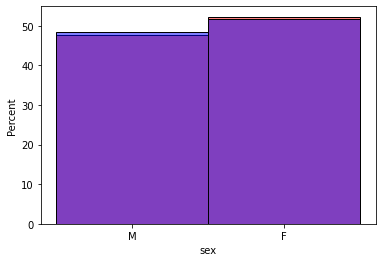

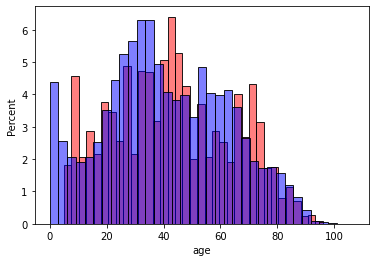

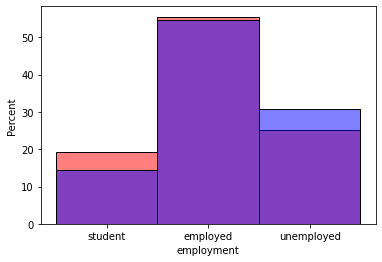

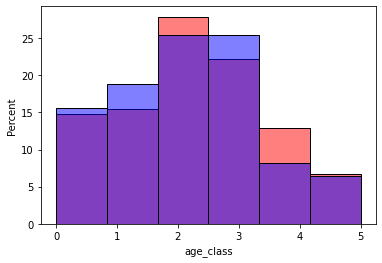

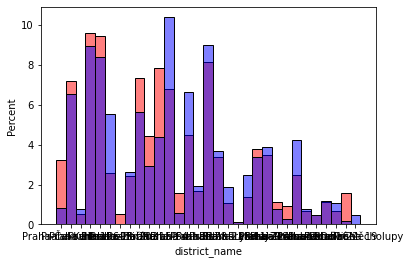

In [2]:
df_hts = pd.read_csv(output_path+'clean_hts_matched.csv', index_col=[0])
display(df_hts.head(2))
df = pd.read_csv(output_path+'clean_census_matched.csv', index_col=[0])
display(df.head(2))
for column in ["sex","age","employment","age_class","district_name"]:
    sns.histplot(x=column, data=df_hts, stat='percent', bins=min(35, len(df_hts[column].unique())), alpha=0.5, color="red")
    sns.histplot(x=column, data=df, stat='percent', bins=min(35, len(df_hts[column].unique())), alpha=0.5, color="blue")
    plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

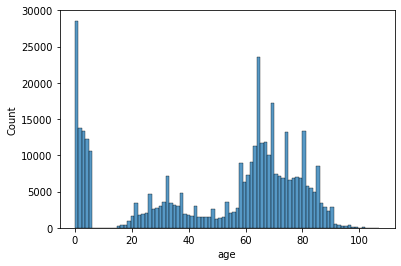

In [3]:
df_unemployed = df[df.employment == "unemployed"]
sns.histplot(x="age", data=df_unemployed)

In [4]:
df_c = pd.DataFrame()
df_c["age"] = df.age.values
df_c["sex"] = df.sex.values
df_c["employment"] = df.employment.values
df_c["type"] = "census"

df_h = pd.DataFrame()
df_h["age"] = df_hts.age.values
df_h["sex"] = df_hts.sex.values
df_h["employment"] = df_hts.employment.values
df_h["type"] = "HTS"

df2 = pd.concat([df_c,df_h])



<AxesSubplot:xlabel='type', ylabel='age'>

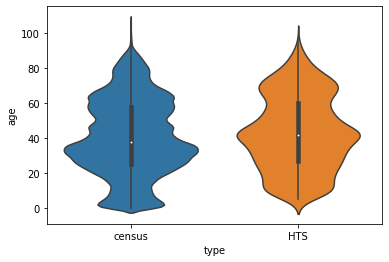

In [5]:
sns.violinplot(x="type", y="age", data=df2)

<AxesSubplot:xlabel='employment', ylabel='age'>

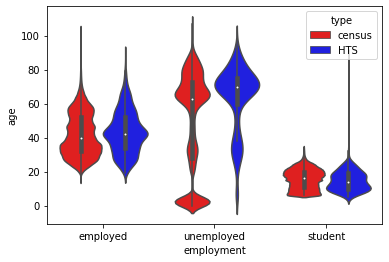

In [6]:
sns.violinplot(x="employment", y="age", hue="type", palette=["r","b"], data=df2)

<AxesSubplot:xlabel='employment', ylabel='age'>

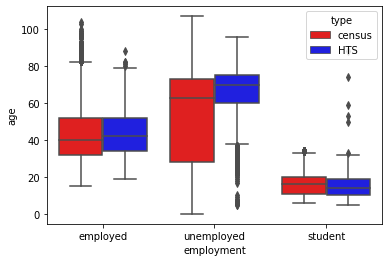

In [7]:
sns.boxplot(x="employment", y="age", hue="type", palette=["r","b"], data=df2)

In [8]:
e_scale = {'unemployed':-1, 'student':0, 'employed':1}
s_scale = {'F':0, 'M':1}
df["employment"] = df["employment"].map(lambda x: e_scale[x])
df_hts["employment"] = df_hts["employment"].map(lambda x: e_scale[x])

df["sex"] = df["sex"].map(lambda x: s_scale[x])
df_hts["sex"] = df_hts["sex"].map(lambda x: s_scale[x])

<AxesSubplot:>

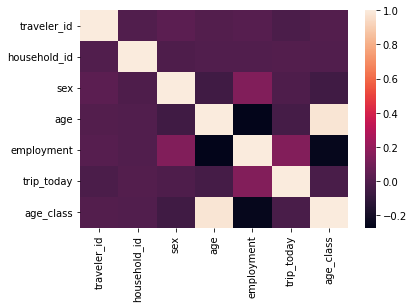

In [9]:
sns.heatmap(df_hts.corr())

<AxesSubplot:>

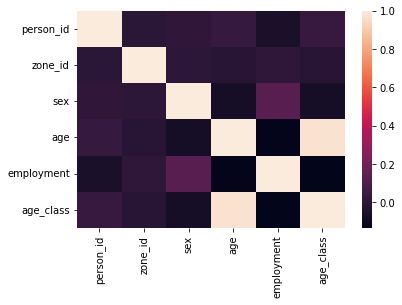

In [10]:
sns.heatmap(df.corr())

In [ ]:
columns = ["sex","age","employment","age_class","district_name"]
cat_cols = ["sex", "employment"]




catted = pd.concat([d.reset_index(drop=True) for d in [df[columns], df_hts[columns]]], axis=1, keys=['df', 'df_hts'])
catted = catted.rename_axis(['Source', 'Column'], axis=1)

corrmat = catted.corr()

f, ax = plt.subplots()

sns.heatmap(corrmat, vmax=.8, square=True)

sources = corrmat.columns.get_level_values(0)
for i, source in enumerate(sources):
    if i and source != sources[i - 1]:
        ax.axhline(len(sources) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()